### Introduction
In this kernal, I will use TF-IDF to vectorize the articles data and cluster them. Then, I will make paper recommendation.

**1. Input data**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
text = pd.read_csv('Final_HIV_without_Nan.csv')

In [3]:
text = text.drop(['Descriptions', 'Authors', 'Published_Dates', 'Keywords', 'Summaries', 'Publication', 'category', 'Source_URLs'], axis=1).dropna().reset_index(drop=True)
text.head()

,Headlines,Articles
0,Drug â€˜can greatly reduce risk of HIV infecti...,A drug used to treat HIV-positive patients may...
1,Afghanistan recorded 1367 HIV/AIDS positive ca...,"At least 1,367 positive cases of Human immunod..."
2,Afghanistan sees 38 percent increase in HIV/AI...,Officials in the ministry of public health of ...
3,"Over 1,200 people live with HIV in Afghanistan...","Today marks World AIDS Day, a time for the glo..."
4,Aishwarya Rai Bachchan named UN HIV/AIDS envoy,The United Nations Monday announced the additi...


**2. Using TF-IDF vectorize the articles**

**Introduction** to TF-IDF

In [4]:
text_content = text['Articles']
vector = TfidfVectorizer(stop_words = 'english')
tfidf = vector.fit_transform(text_content)
text_content.head()

0    A drug used to treat HIV-positive patients may...
1    At least 1,367 positive cases of Human immunod...
2    Officials in the ministry of public health of ...
3    Today marks World AIDS Day, a time for the glo...
4    The United Nations Monday announced the additi...
Name: Articles, dtype: object

**3. Using elbow method to decide cluster number**

Introduction to **elbow method**

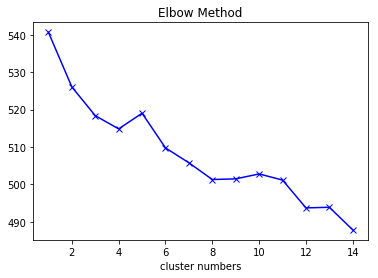

In [5]:
K = range(1,15)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k,batch_size = 300)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)

plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

**5. Using MiniBatchKMean to cluster**

**Comparison of the K-Means and MiniBatchKMeans clustering algorithms**

In [6]:
k = 4
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['vaccine', 'south', 'hiv', 'tangerang', 'africa', 'study', 'gene', 'commission', 'virus', 'people', 'aids', 'municipality', 'new', 'years', 'million']
cluster1:
['hiv', 'aids', 'said', 'news', 'people', 'children', 'india', 'data', 'health', 'latest', 'updates', 'track', 'live', 'cases', 'results']
cluster2:
['blood', 'news', 'woman', 'hospital', 'updates', 'india', 'track', 'latest', 'live', 'data', 'results', 'said', 'government', 'hiv', 'police']
cluster3:
['hiv', 'aids', 'nam', 'people', 'health', 'cent', 'said', 'prevention', 'viet', 'treatment', 'viá', 'patients', '90', 'insurance', 'arv']


**6. Article Recommendation**

Since we had vectorize the articles by TF-IDF, we only need to compare articles by comparing their vectors. Bigger inner product of two vectors means they shares more similar information.

In [7]:
similarity = np.dot(tfidf[0],np.transpose(tfidf))
x = np.array(similarity.toarray()[0])
print(text['Headlines'][0])
print('\nsimiliar papers:')
print('\n'.join(text['Headlines'].loc[np.argsort(x)[-7:-2]]))

Drug â€˜can greatly reduce risk of HIV infectionâ€™

similiar papers:
Search for HIV vaccine resumes with test in South Africa
Viet Nam faces uphill battle against HIV
Man to man HIV interventions make headway
Rights group, worried about HIV, urges Philippines action
Your letters: Pope: There are bigger issues than HIV


**7. Topics modeling**

Here I use NMF instead of LDA because LDA's calculation is time-consuming.

The major topics consist of politics, society, finance and internetional affairs, which is quite similiar to our cluster result.

In [8]:
from sklearn.decomposition import NMF

nmf  = NMF(n_components = 4)
nmf.fit(tfidf)
for i in range(0,k):
    word_list=[]
    print("Topic%d:"% i)
    for j in nmf.components_.argsort()[i,-16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['women', 'health', 'number', 'positive', 'sex', 'virus', 'indonesia', 'jakarta', 'infected', 'percent', 'children', 'cases', 'people', 'said', 'aids']
Topic1:
['elections', 'lok', 'sabha', 'toi', 'said', 'hospital', 'woman', 'results', 'data', 'live', 'latest', 'track', 'updates', 'blood', 'india']
Topic2:
['said', 'ng', 'nam', 'hcm', 'city', 'aids', 'people', 'arv', 'treatment', 'patients', 'cent', 'viá', 'health', '90', 'insurance']
Topic3:
['000', 'children', 'programme', 'international', 'vns', 'living', 'said', 'people', 'noi', 'project', 'ha', 'prevention', 'nam', 'viet', 'aids']
